In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit

In [2]:
import pandas
filename = 'online_shoppers_intention.csv'
data = pandas.read_csv(filename, header=0)

print("Número de muestras: ", data.shape[0])
print("Número de características: ", data.shape[1])

Número de muestras:  12330
Número de características:  18


In [3]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [6]:
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [7]:
data['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [8]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [9]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
data["Weekend"] = data["Weekend"].astype(int)

In [11]:
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [12]:
data['Revenue'] = data["Revenue"].astype(int)

In [13]:
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [14]:
data['Month'] = data['Month'].astype('str')

In [15]:
data['Month'] = np.where(data['Month']=="Feb", 0, data['Month'])
data['Month'] = np.where(data['Month']=="Mar", 1, data['Month'])
data['Month'] = np.where(data['Month']=="May", 2, data['Month'])
data['Month'] = np.where(data['Month']=="June", 3, data['Month'])
data['Month'] = np.where(data['Month']=="Jul", 4, data['Month'])
data['Month'] = np.where(data['Month']=="Aug", 5, data['Month'])
data['Month'] = np.where(data['Month']=="Sep", 6, data['Month'])
data['Month'] = np.where(data['Month']=="Oct", 7, data['Month'])
data['Month'] = np.where(data['Month']=="Nov", 8, data['Month'])
data['Month'] = np.where(data['Month']=="Dec", 9, data['Month'])
    

In [16]:
data['Month'].value_counts()

2    3364
8    2998
1    1907
9    1727
7     549
6     448
5     433
4     432
3     288
0     184
Name: Month, dtype: int64

In [17]:
data['VisitorType'] = np.where(data['VisitorType']=="Returning_Visitor", 0, data['VisitorType'])
data['VisitorType'] = np.where(data['VisitorType']=="New_Visitor", 1, data['VisitorType'])
data['VisitorType'] = np.where(data['VisitorType']=="Other", 2, data['VisitorType'])

In [18]:
data['VisitorType'].value_counts()

0    10551
1     1694
2       85
Name: VisitorType, dtype: int64

In [19]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,0,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,0,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,0,3,3,1,4,0,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,0,2,2,1,3,0,0,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,0,2,4,3,3,0,0,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,0,1,2,1,5,0,1,0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,0,2,2,2,3,0,0,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,0,2,4,1,2,0,0,0


In [20]:
data['Month'] = data['Month'].astype('int')

In [21]:
data['VisitorType'] = data['VisitorType'].astype('str').astype('int')

In [22]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int32
Weekend                      int32
Revenue                      int32
dtype: object

In [23]:
X = data.drop('Revenue', axis=1)
Y = data["Revenue"]
print(X.shape, Y.shape)

(12330, 17) (12330,)


Validación

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
Xtrain = scaler.fit_transform(X)


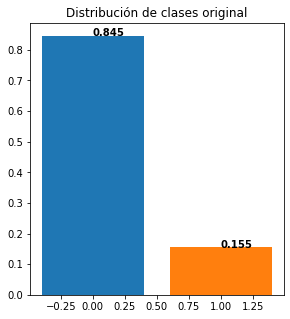

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(0,np.sum(Y==0)/Y.shape[0])
plt.bar(1,np.sum(Y==1)/Y.shape[0])
plt.title('Distribución de clases original')
for i in range(2):
    plt.text(i, np.sum(Y==i)/Y.shape[0], str(round(np.sum(Y==i)/Y.shape[0],3)), color='black', fontweight='bold')

In [26]:
from sklearn.metrics import roc_auc_score

def calculateAUC(clf):
    prob_y_0 = clf.predict_proba(X_test)
    
    prob_y_0 = [p[1] for p in prob_y_0]

    print( roc_auc_score(y_test, prob_y_0) )

In [27]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold

In [29]:
#calculateAUC(clf)

0.8798976997517861


Modelos

In [29]:
skf = StratifiedKFold(n_splits=4)

Este tiene como medida de desempeño AUC y el accuracy, sólo puse el accuracy como para ver algo, pero en sí se usa sin el accuracy, sólo con el AUC, esa es la prueba que está después de esta.

In [ ]:
scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {'svc__kernel':('linear', 'poly', 'rbf'), #, 'sigmoid'
              'svc__gamma':('scale','auto'),
              'svc__C':(0.001, 0.01, 1, 10, 100)}

pp = make_pipeline(StandardScaler(), SVC(probability = True))

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True, n_jobs=-1, verbose=10)

gs.fit(X, Y)

In [ ]:
results_svc = gs.cv_results_
data = pandas.DataFrame(results_svc)
data

In [34]:
gs.best_params_

{'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [ ]:
scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {'svc__kernel':('linear', 'poly', 'rbf'), #, 'sigmoid'
              'svc__gamma':('scale','auto'),
              'svc__C':(0.001, 0.01, 1, 10, 100)
              }#'svc__class_weight': ('balanced')

pp = make_pipeline(StandardScaler(), SVC(probability = True))

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10)

gs.fit(X, Y)

In [ ]:
results_svc2 = gs.cv_results_
data = pandas.DataFrame(results_svc2)
data

In [37]:
gs.best_params_

{'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {'gradientboostingclassifier__loss':('deviance', 'exponential'), 
              'gradientboostingclassifier__learning_rate':([1, 0.5, 0.1,0.001,0.0001]), #,0.00001,0.000001
              'gradientboostingclassifier__n_estimators':([10, 100, 500]),
             }

pp = make_pipeline(StandardScaler(), GradientBoostingClassifier())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True, n_jobs=-1, verbose=10)

gs.fit(X, Y)

In [ ]:
results_gbt= gs.cv_results_
data = pandas.DataFrame(results_gbt)
data

In [40]:
gs.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'exponential',
 'gradientboostingclassifier__n_estimators': 100}

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {'quadraticdiscriminantanalysis__reg_param':([0, 0.001, 0.01, 0.1, 0.6, 1]), 
              'quadraticdiscriminantanalysis__store_covariance':(True,False)}

pp = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis()) 

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True, n_jobs=-1, verbose=10)

gs.fit(X, Y)

In [ ]:
results_qda= gs.cv_results_
data = pandas.DataFrame(results_qda)
data

In [ ]:
gs.best_params_ #1 y True

In [ ]:
bandwidths = 10 ** np.linspace(-1, 1, 25)
scoring = {'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)}  #'AUC': 'roc_auc', 
parameters = {'kerneldensity__kernel':('gaussian'),  
              'kerneldensity__algorithm':('kd_tree','ball_tree','auto'),
              'kerneldensity__bandwidth': bandwidths}

pp = make_pipeline(StandardScaler(), KernelDensity()) 

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='F-score', return_train_score=True, n_jobs=-1, verbose=10) #scoring=scoring
gs.fit(X_train, y_train)
results = gs.cv_results_

In [ ]:
results_kd= gs.cv_results_
data = pandas.DataFrame(results_kd)
data

In [53]:
gs.best_params_

{'kerneldensity__algorithm': 'kd_tree',
 'kerneldensity__bandwidth': 0.33598182862837817,
 'kerneldensity__kernel': 'gaussian'}

In [ ]:
from sklearn.neural_network import MLPClassifier

scoring = {'AUC': 'roc_auc', 'F-score': 'f1', 'Sensitivity': make_scorer(recall_score)} 
parameters = {
    'hidden_layer_sizes': np.arange(10, 40),
    'max_iter': (250, 500, 800)
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'solver': ['sgd', 'adam'],
    'alpha': 10.0 ** -np.arange(0.5, 2),
    'learning_rate': ('constant','adaptive'), 
}

pp = make_pipeline(StandardScaler(), MLPClassifier())

gs = GridSearchCV(pp, parameters, cv=skf, scoring=scoring, refit='AUC', return_train_score=True, n_jobs=-1, verbose=10) 
gs.fit(X_train, y_train)
results = gs.cv_results_

In [ ]:
results_mlp = gs.cv_results_
data = pandas.DataFrame(results_mlp)
data

In [ ]:
gs.best_params_

In [ ]:
dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 
           'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 
           'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 
           'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
np.linspace(-1, 1, 10)

In [ ]:
bandwidths = 10 ** np.linspace(-1, 1, 25)
scoring = {'AUC': 'roc_auc'}
parameters = {'kerneldensity__kernel':('gaussian','tophat'),  
              'kerneldensity__algorithm':('kd_tree','ball_tree','auto'),
              'kerneldensity__bandwidth': bandwidths}

pp = make_pipeline(StandardScaler(), KernelDensity()) 

gs = GridSearchCV(pp, parameters, cv=skf,  refit='AUC', return_train_score=True) #scoring=scoring
gs.fit(X_train, y_train)
results = gs.cv_results_

In [ ]:
modelo = MLPClassifier()
parametros = {'solver': ['lbfgs'], 
              'max_iter': [300,500, 800, 1000], # Iteraciones máximas en cada red
              'alpha': 10.0 ** -np.arange(0.5, 2), # Parámetro de regularización L2 para evitar sobreajuste
              'hidden_layer_sizes':np.arange(10, 35), # Número de neuronas en cada capa
              'random_state':[0]}
modelo_gs2 = GridSearchCV(modelo, param_grid=parametros, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs2.fit(X_train, Y_train)